In [66]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster


In [52]:
archivos=glob.glob('*.png')

In [58]:
data=[]
for archivo in archivos:
    imagen=plt.imread(archivo)
    img=imagen.reshape((-1,3))
    data.append(img)

data=np.array(data)
data=data.reshape((87,-1))
print(np.shape(data))

(87, 30000)


In [61]:
inertia=np.zeros((20,2))
for n_clusters in range(20):
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters+1)
    k_means.fit(data)
    cluster = k_means.predict(data)
    inertia[n_clusters]=[n_clusters+1,k_means.inertia_]
    print(100*(n_clusters+1)/20,'%',' ',n_clusters+1,' clusters procesados')
    
#    X_centered = X.copy()
#    for i in range(n_clusters):
#        ii = cluster==i
#        X_centered[ii,:] = np.int_(k_means.cluster_centers_[i])



5.0 %   1  clusters procesados
10.0 %   2  clusters procesados
15.0 %   3  clusters procesados
20.0 %   4  clusters procesados
25.0 %   5  clusters procesados
30.0 %   6  clusters procesados
35.0 %   7  clusters procesados
40.0 %   8  clusters procesados
45.0 %   9  clusters procesados
50.0 %   10  clusters procesados
55.0 %   11  clusters procesados
60.0 %   12  clusters procesados
65.0 %   13  clusters procesados
70.0 %   14  clusters procesados
75.0 %   15  clusters procesados
80.0 %   16  clusters procesados
85.0 %   17  clusters procesados
90.0 %   18  clusters procesados
95.0 %   19  clusters procesados
100.0 %   20  clusters procesados


Text(0.5, 1, 'El número óptimo de clusters es K=4')

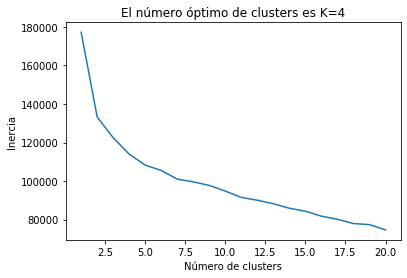

In [67]:
plt.plot(inertia[:,0],inertia[:,1])
plt.ylabel('Inercia')
plt.xlabel('Número de clusters')
plt.savefig('inercia.png')
plt.title('El número óptimo de clusters es K=4')

ValueError: num must be 1 <= num <= 20, not 21

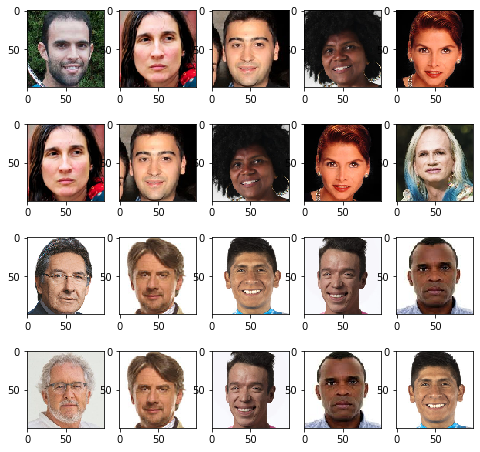

In [139]:
n_clusters=5
plt.figure(figsize=(8,8))
j=0
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(data)
cluster = k_means.predict(data)
norma=k_means.transform(data)
for i in range(n_clusters):

    archiv=np.array(archivos)
    archiv=archiv[np.argsort(norma[:,i])[-5:]]
    
    
    for archivo in archiv:
        plt.subplot(4,5,j+1)
        img=plt.imread(archivo)
        plt.imshow(img)
        j+=1
plt.tight_layout()
plt.savefig('ejemplo_clases.png')